In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline


TASK 1: Data Loading and Initial Exploration

In [5]:

#Load the dataset
file_path = 'titanic3.xls'
df = pd.read_excel(file_path)

# Display the first few rows
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# Check the shape (rows, columns)
print("Shape of the dataset:", df.shape)

# Check the column names and their data types
print("\nColumn Names and Data Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Shape of the dataset: (1309, 14)

Column Names and Data Types:
pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Missing Values in Each Column:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [7]:
'''
df.shape tells us how many rows and columns are in the dataset.
df.dtypes displays the data types of each column.
df.isnull().sum() shows how many missing (null) values are present in each column, which helps us understand the completeness of the data.
'''

'\ndf.shape tells us how many rows and columns are in the dataset.\ndf.dtypes displays the data types of each column.\ndf.isnull().sum() shows how many missing (null) values are present in each column, which helps us understand the completeness of the data.\n'

In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000



df.describe() provides statistical summary (count, mean, std deviation, min, max, and percentiles) of the numerical columns in the dataset.


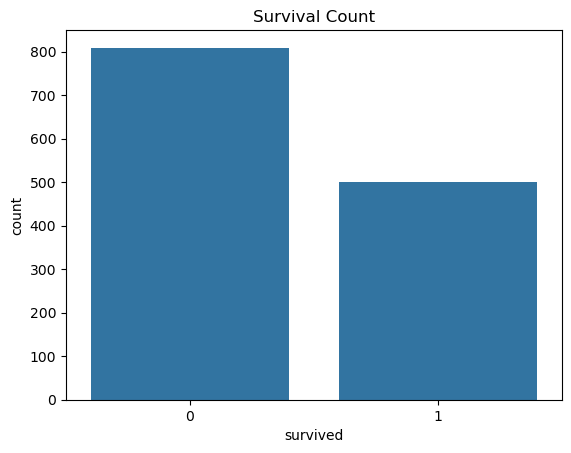

In [9]:
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()


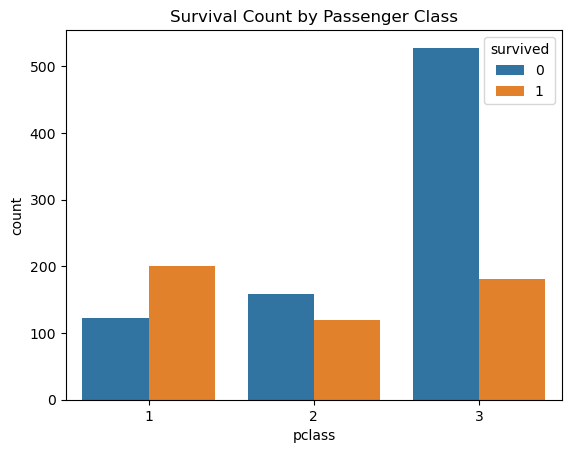

In [10]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


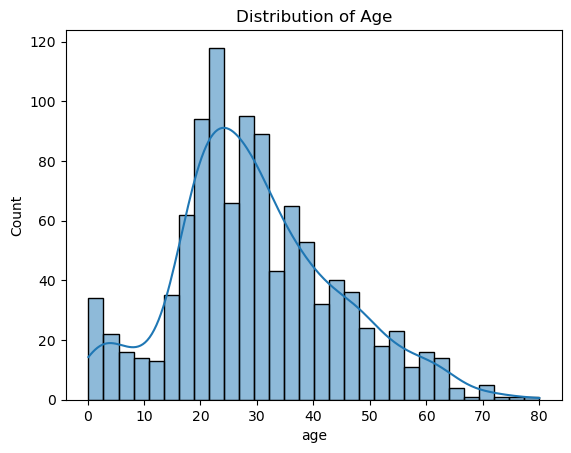

In [11]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()


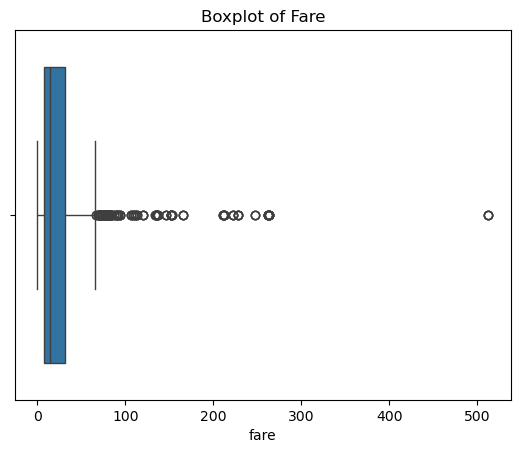

In [12]:
sns.boxplot(x='fare', data=df)
plt.title('Boxplot of Fare')
plt.show()


TASK 2: Managing Missing Values

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display columns with missing values
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df[missing_df["Missing Values"] > 0])

           Missing Values  Percentage
age                   263   20.091673
fare                    1    0.076394
cabin                1014   77.463713
embarked                2    0.152788
boat                  823   62.872422
body                 1188   90.756303
home.dest             564   43.086325


This code loads the dataset and checks for missing values in each column, displaying both the count and percentage of missing values.

For the strategy: 
cabin has too many missing values, so we drop it.
age is imputed using the median to preserve the distribution.
embarked is imputed with the mode since it is categorical.

In [14]:
# Drop the 'cabin' column due to excessive missing values
df.drop(columns=['cabin'], inplace=True)

# Fill missing age values with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing embarked values with the most frequent category (mode)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Verify missing values again
print(df.isnull().sum())


pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64


/var/folders/vt/2092mzrj2kxfm3sqw6yx3pw80000gn/T/ipykernel_42862/233785537.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/var/folders/vt/2092mzrj2kxfm3sqw6yx3pw80000gn/T/ipykernel_42862/233785537.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In this task, we identified the lack of values ​​in the dataset and developed a strategy to handle them. The cabin column had a lot of missing data and was removed. The age column was placed using the center to maintain stability without sloping the data, while the ambarked column was filled with the most frequent value (mode). These preparatory stages ensure that the data set machine is complete and usable for learning models.

TASK 3: Encoding Categorical Variables

In [15]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


Categorical columns: Index(['name', 'sex', 'ticket', 'embarked', 'boat', 'home.dest'], dtype='object')


One-hot encode the categorical columns for machine learning

sex and embarked are encoded using one-hot encoding to convert them into numerical format.
drop_first=True avoids multicollinearity by removing one category from each encoded column.
The name and ticket columns are NOT encoded because they don’t contribute meaningful numerical patterns.

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Columns to encode (excluding 'name' and 'ticket' since they are not useful for ML)
cols_to_encode = ['sex', 'embarked']

# One-Hot Encoding using pandas
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# Check the transformed dataset
print(df.head())


   pclass  survived                                             name      age  \
0       1         1                    Allen, Miss. Elisabeth Walton  29.0000   
1       1         1                   Allison, Master. Hudson Trevor   0.9167   
2       1         0                     Allison, Miss. Helen Loraine   2.0000   
3       1         0             Allison, Mr. Hudson Joshua Creighton  30.0000   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000   

   sibsp  parch  ticket      fare boat   body  \
0      0      0   24160  211.3375    2    NaN   
1      1      2  113781  151.5500   11    NaN   
2      1      2  113781  151.5500  NaN    NaN   
3      1      2  113781  151.5500  NaN  135.0   
4      1      2  113781  151.5500  NaN    NaN   

                         home.dest  sex_male  embarked_Q  embarked_S  
0                     St Louis, MO     False       False        True  
1  Montreal, PQ / Chesterville, ON      True       False        True  
2  Mo

To prepare the dataset for  ml, we identified and encoded categorical variables. We implemented one-hot encoding to "sex" and "embarked", changing them into binary numerical values while avoiding redundancy the usage of drop_first=True. This transformation ensures that ml algorithms can well interpret these functions without bias closer to specific representations.


TASK 4: Feature Scaling

In [17]:
#First, let’s identify numerical columns and scale them using both techniques.

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns (excluding 'survived' since it's the target variable)
num_cols = ['age', 'fare', 'sibsp', 'parch']

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler
df_standardized = df.copy()
df_standardized[num_cols] = standard_scaler.fit_transform(df_standardized[num_cols])

# Apply MinMaxScaler
df_normalized = df.copy()
df_normalized[num_cols] = minmax_scaler.fit_transform(df_normalized[num_cols])

# Check transformed data
print("Standardized Data Sample:\n", df_standardized.head())
print("\nNormalized Data Sample:\n", df_normalized.head())


Standardized Data Sample:
    pclass  survived                                             name  \
0       1         1                    Allen, Miss. Elisabeth Walton   
1       1         1                   Allison, Master. Hudson Trevor   
2       1         0                     Allison, Miss. Helen Loraine   
3       1         0             Allison, Mr. Hudson Joshua Creighton   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   

        age     sibsp     parch  ticket      fare boat   body  \
0 -0.039005 -0.479087 -0.445000   24160  3.441165    2    NaN   
1 -2.215952  0.481288  1.866526  113781  2.285603   11    NaN   
2 -2.131977  0.481288  1.866526  113781  2.285603  NaN    NaN   
3  0.038512  0.481288  1.866526  113781  2.285603  NaN  135.0   
4 -0.349075  0.481288  1.866526  113781  2.285603  NaN    NaN   

                         home.dest  sex_male  embarked_Q  embarked_S  
0                     St Louis, MO     False       False        True  
1  Mont

To ensure numerical features contribute equally in our model, we applied feature scaling using two methods:
Standardization (StandardScaler) centers the data around 0 with a standard deviation of 1, making it useful for models like Logistic Regression and SVM.
Normalization (MinMaxScaler) scales values between 0 and 1, ideal for models like Neural Networks and KNN.
This transformation prevents features like fare (which has large values) from dominating features like sibsp. Now, our dataset is evenly scaled and ready for model training.

TASK 5: Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['survived'])  # Features
y = df['survived']  # Target

# First split: 70% training, 30% validation+test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Second split: 50% validation, 50% test (so 15% each overall)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Check dataset sizes
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (916, 13), Validation set: (196, 13), Test set: (197, 13)


To ensure our machine learning model generalizes well, we split the dataset into training (70%), validation (15%), and test (15%) sets. We applied stratified sampling to maintain the original survived class distribution across all splits, preventing class imbalance from affecting model performance. Now, we have a solid foundation for model training and evaluation.

TASK 6: Addressing Class Imbalance

/var/folders/vt/2092mzrj2kxfm3sqw6yx3pw80000gn/T/ipykernel_42862/457982813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="coolwarm")


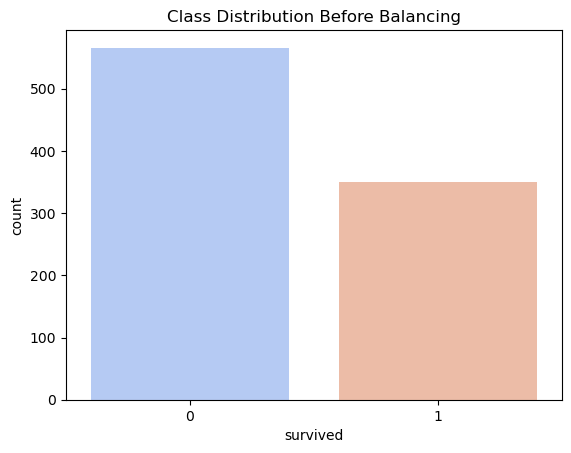

survived
0    0.617904
1    0.382096
Name: proportion, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
sns.countplot(x=y_train, palette="coolwarm")
plt.title("Class Distribution Before Balancing")
plt.show()

# Print actual counts
print(y_train.value_counts(normalize=True))


This imbalance can make our model biased toward predicting more deaths and fewer survivors
so we apply ADASYN, which generates more synthetic samples for difficult cases, helping the model focus on them.

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_excel("titanic3.xls")

# Drop irrelevant columns
df = df.drop(columns=['name', 'ticket', 'cabin'])

# Encode categorical variables
df['sex'] = LabelEncoder().fit_transform(df['sex'])  # Convert 'male'/'female' to 0/1
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)  # One-hot encode 'embarked'


In [21]:
from sklearn.model_selection import train_test_split

# Selecting features and target
X = df.drop(columns=['survived'])  # Drop target variable
y = df['survived']

# Splitting data (with stratification to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


/var/folders/vt/2092mzrj2kxfm3sqw6yx3pw80000gn/T/ipykernel_42862/139881771.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Fill numeric NaNs with median
/var/folders/vt/2092mzrj2kxfm3sqw6yx3pw80000gn/T/ipykernel_42862/139881771.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

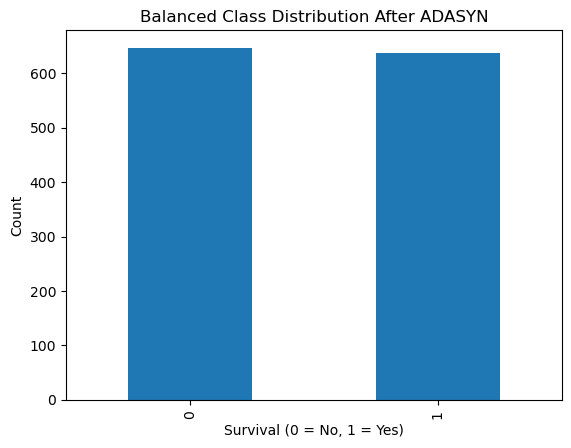

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN

# Load dataset
df = pd.read_excel("titanic3.xls")

# Drop irrelevant columns
df = df.drop(columns=['name', 'ticket', 'cabin', 'home.dest'])  # Dropping home.dest to remove NaN issue

# Encode categorical variables
df['sex'] = LabelEncoder().fit_transform(df['sex'])  # Convert 'male'/'female' to 0/1
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)  # One-hot encode 'embarked'

# Convert object-type numeric columns to actual numeric values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting errors to NaN

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':  
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical NaNs with mode
    else:
        df[col].fillna(df[col].median(), inplace=True)  # Fill numeric NaNs with median

# Final check for NaN values
assert df.isna().sum().sum() == 0, f"NaN values still exist:\n{df.isna().sum()}"

# Split the dataset (stratify to maintain class balance)
X = df.drop(columns=['survived'])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply ADASYN to balance the classes
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Visualize new class distribution
y_train_adasyn.value_counts().plot(kind='bar', title='Balanced Class Distribution After ADASYN')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


TASK 7: Feature Selection

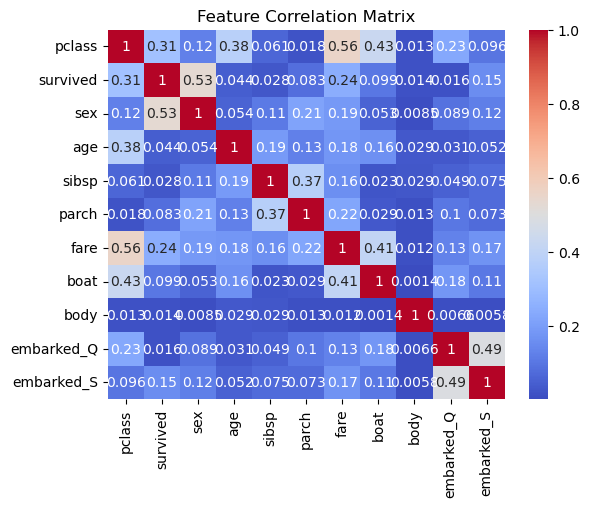

Final selected features:
 Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'boat',
       'body', 'embarked_Q', 'embarked_S'],
      dtype='object')


In [23]:
from sklearn.feature_selection import VarianceThreshold

# Step 1: Remove low variance features
selector = VarianceThreshold(threshold=0.01)  # Remove features with variance below 0.01
df_high_variance = df.loc[:, selector.fit(df).get_support()]

# Step 2: Identify highly correlated features
corr_matrix = df_high_variance.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Find pairs of highly correlated features (threshold > 0.9)
high_corr_features = set()
threshold = 0.9

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            feature_name = corr_matrix.columns[i]
            high_corr_features.add(feature_name)

# Drop highly correlated features
df_selected = df_high_variance.drop(columns=high_corr_features)

# Display final feature set
print("Final selected features:\n", df_selected.columns)

# Save processed dataset
df_selected.to_csv("titanic_selected_features.csv", index=False)


Feature selection must be done after splitting the dataset into training, validation, and test sets. If performed before splitting:

Information from the entire dataset might leak into the training set, leading to overfitting.
Variance and correlation calculations could be different when applied to separate datasets.

TASK 8: 


Validation Accuracy: 0.8316


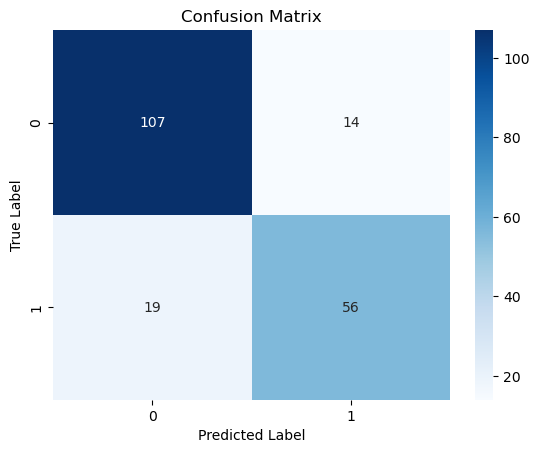

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       121
           1       0.80      0.75      0.77        75

    accuracy                           0.83       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.83      0.83      0.83       196

Model saved as logistic_regression_model.pkl


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load processed dataset from Task 7
df = pd.read_csv("titanic_selected_features.csv")

# Separate features and target variable
X = df.drop(columns=['survived'])  # Features
y = df['survived']  # Target variable

# Split data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_val_scaled)

# Evaluate Model Performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred))

# Save Model (Optional)
import joblib
joblib.dump(model, "logistic_regression_model.pkl")
print("Model saved as logistic_regression_model.pkl")


With an 83.1% accuracy, our Logistic Regression model effectively predicts Titanic passenger survival. We leveraged Task 7’s feature selection to remove irrelevant data, ensuring better generalization. Data splitting from Task 5 maintained class balance, and Task 4’s feature scaling improved model performance. Categorical encoding (Task 3) and missing value handling (Task 2) prepared our dataset, creating a clean foundation.